In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from import_pkg import eigenform

In [25]:
import pickle
import numpy as np
from itertools import chain
from matplotlib import pyplot as plt

## make NormalizedSpace

In [10]:
def load_aligned_space(prefix):
    aligned_path = eigenform.get_data_dir() / f"svd/align_space_{prefix}.pkl"
    with aligned_path.open("rb") as fin:
        aspace = pickle.load(fin)
    return aspace

In [21]:
hei_space = load_aligned_space("hei")
norm_bases = hei_space["align_bases"]
norm_coeff = hei_space["align_coeff"]
font_list = "kai,li,shao,xing".split(",")
for prefix in font_list:
    aspace = load_aligned_space(prefix)
    norm_bases += aspace["align_bases"]
    norm_coeff += aspace["align_coeff"]
norm_bases /= len(font_list)+1
norm_coeff /= len(font_list)+1

In [23]:
def plot_ECs_50(U, fig_path):
    fig, axes = plt.subplots(5, 10, squeeze=False)
    fig.set_size_inches(12, 8)
    for ec_i, ax in enumerate(chain.from_iterable(axes)):        
        ax.imshow(eigenform.recon(U[:,ec_i], 64), cmap='gray')
        ax.axis('off')
        ax.set_title(f'EC{ec_i}')
    ## fig.savefig(fig_path)

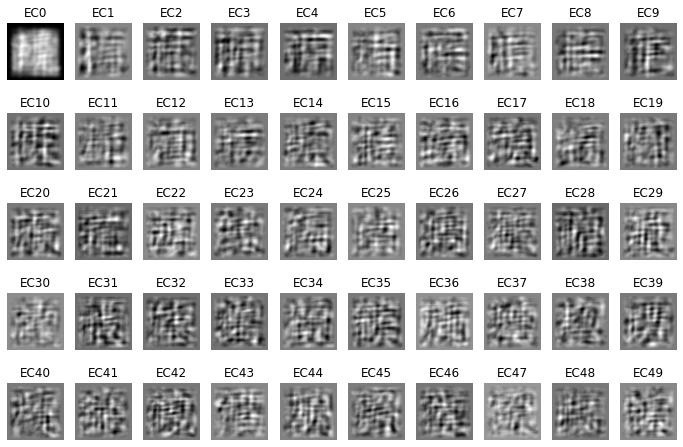

In [26]:
plot_ECs_50(norm_bases, None)

In [28]:
reconX = norm_bases.dot(norm_coeff)

In [49]:
import json
with (eigenform.get_data_dir()/"vocabs.json").open("r", encoding="UTF-8") as fin:
    vocabs = json.load(fin)

In [81]:
norm_space = eigenform.FormSpace("norm", vocabs, 100, norm_bases, norm_coeff)

In [101]:
compo_idx = 20
print("negative: ", norm_space.most_loaded(compo_idx, True))
print("positive: ", norm_space.most_loaded(compo_idx, False))

negative:  ['踱', '痺', '簇', '瘖', '捱', '朵', '掇', '蠣', '熿', '痧']
positive:  ['洋', '泩', '佯', '肥', '徉', '沱', '沰', '紐', '涅', '守']


In [104]:
norm_space.most_similar("紐")

['紐',
 '組',
 '妞',
 '紜',
 '經',
 '紙',
 '輜',
 '扭',
 '忸',
 '紛',
 '綞',
 '綜',
 '緝',
 '鉏',
 '紹',
 '縲',
 '輕',
 '紺',
 '終',
 '怛']

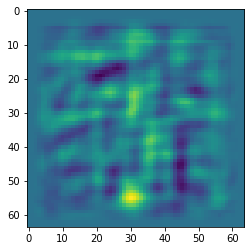

In [39]:
plt.imshow(eigenform.recon(reconX[:,50], 64))